# The Fixed-Point Iteration Method

---

## 1. Introduction

The **Fixed-Point Iteration Method** reframes the root-finding problem $f(x) = 0$ into a different form. Instead of searching for where a function crosses the x-axis, we search for a **fixed point** of an iteration function $g(x)$.

A fixed point of a function $g$ is a value $x$ such that $x = g(x)$.

The core idea is to algebraically manipulate the original equation $f(x) = 0$ into the form $x = g(x)$. For any given $f(x)$, there can be many possible choices for $g(x)$. Once we have a suitable function $g(x)$, we can find the fixed point (and thus the root of $f(x)$) using the iterative formula:

$$ x_{k+1} = g(x_k) $$

Starting with an initial guess $x_0$, we generate a sequence $x_1, x_2, x_3, \ldots$. If the sequence converges, its limit will be the fixed point.

## 2. The Convergence Condition

The most critical aspect of this method is that **convergence is not guaranteed**. It depends entirely on the choice of the iteration function $g(x)$. The key condition for convergence is given by the **Fixed-Point Theorem**.

**Theorem: Condition for Convergence**
> Let $g(x)$ be an iteration function. If:
> 1.  $g(x)$ and its derivative $g'(x)$ are **continuous** in an interval $I$ that contains the fixed point $r$.
> 2.  There exists a constant $K$ such that $|g'(x)| \le K < 1$ for all $x$ in $I$.
> 3.  An initial guess $x_0$ is chosen within this interval $I$.
> Then, the sequence generated by $x_{k+1} = g(x_k)$ is **guaranteed to converge** to the unique fixed point $r$ in $I$.

In simple terms, if the magnitude of the slope of $g(x)$ is consistently less than 1 near the root, the iterations will spiral or staircase inwards towards the fixed point. If $|g'(x)| > 1$, the iterations will spiral outwards, and the method will diverge.

### Visualizing Convergence vs. Divergence

A graphical way to see this is by plotting $y=x$ and $y=g(x)$. The fixed point is where these two lines intersect. The iterative process can be visualized as a "cobweb" or "staircase" diagram. 

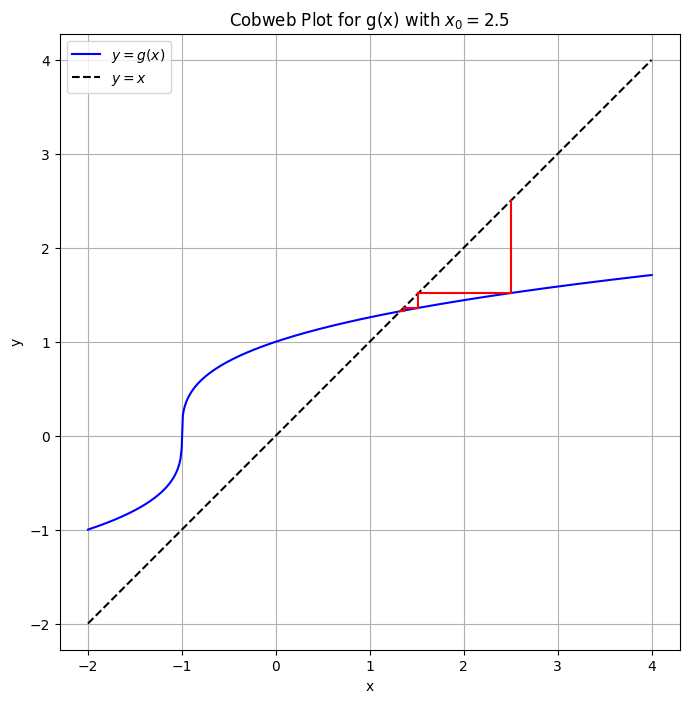

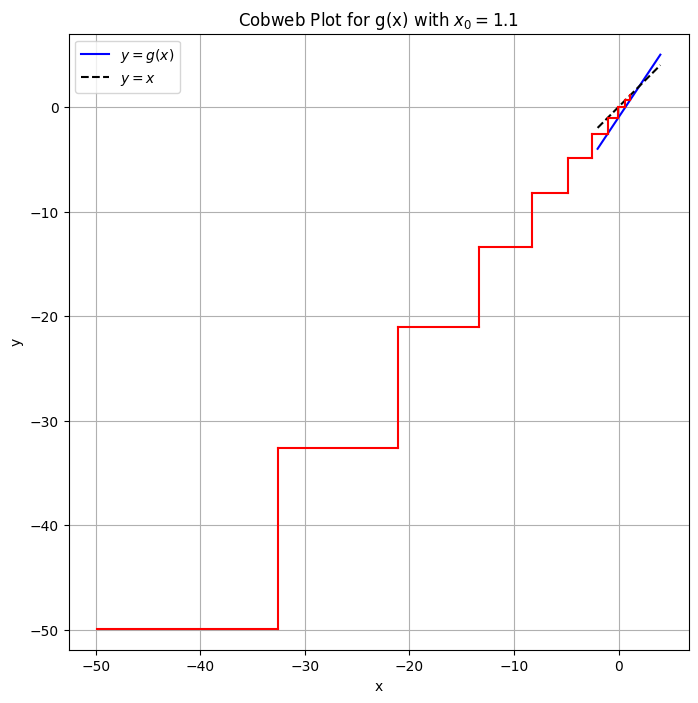

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cobweb(g, x0, n_iter=10):
    """Creates a cobweb plot to visualize the fixed-point iteration."""
    x = np.linspace(-2, 4, 500)
    y = g(x)
    
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'b-', label='$y=g(x)$')
    plt.plot(x, x, 'k--', label='$y=x$')

    # Plotting the cobweb
    x_k = x0
    for _ in range(n_iter):
        y_k = g(x_k)
        plt.plot([x_k, x_k], [x_k, y_k], 'r-') # Vertical line to curve
        plt.plot([x_k, y_k], [y_k, y_k], 'r-') # Horizontal line to y=x
        x_k = y_k
        
    plt.title(f"Cobweb Plot for g(x) with $x_0={x0}$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example of a CONVERGENT function: g(x) = cbrt(x+1)
g1 = lambda x: np.cbrt(x + 1)
plot_cobweb(g1, x0=2.5)

# Example of a DIVERGENT function: g(x) = x^3 - 1
g2 = lambda x: 1.5* x - 1
plot_cobweb(g2, x0=1.1)

## 3. The Algorithm

1.  **Input**: An initial approximation $x_0$, the iteration function $g(x)$, a tolerance $\epsilon$, and a maximum number of iterations `max_iter`.
2.  **Initialize**: Set a counter $k = 1$.
3.  **Loop**: While $k \le$ `max_iter`:
    a. Calculate the next approximation: $x_k = g(x_{k-1})$.
    b. Check the stopping criterion. For example, if $|x_k - x_{k-1}| < \epsilon$, stop.
    c. Increment the counter: $k = k + 1$.
4.  **Output**: Return the final approximation $x_k$.

## 4. Example: The Art of Choosing a Convergent $g(x)$

The main challenge of the Fixed-Point Method is finding a suitable iteration function $g(x)$. For a single equation $f(x)=0$, there are often many ways to rearrange it into the form $x=g(x)$.

Let's consider the equation $f(x) = 2x^2 - 5x + 2 = 0$. The roots are $\alpha_1 = 0.5$ and $\alpha_2 = 2$. Let's try to find two different $g(x)$ functions from this $f(x)$.

--- 
#### Derivation 1: Isolating $x$ from the $2x^2$ term
$$
2x^2 - 5x + 2 = 0 \implies 2x^2 = 5x - 2 \implies x^2 = \frac{5x-2}{2} \implies x = \sqrt{\frac{5x-2}{2}}
$$

This gives us our first candidate iteration function: $g_a(x) = \sqrt{2.5x - 1}$.

--- 
#### Derivation 2: Isolating $x$ from the $-5x$ term
$$ 2x^2 - 5x + 2 = 0 $$
$$
5x = 2x^2 + 2 \implies x = \frac{2x^2+2}{5}
$$ 
This gives us our second candidate iteration function: $g_b(x) = 0.4x^2 + 0.4$.

--- 
### Analysis: Which Function Converges to the Root $\alpha_1 = 0.5$?

We must check the **first derivative** of each candidate function to see if $|g'(x)| < 1$ near the root $x = 0.5$.

**Analysis of $g_a(x)$:**
$$
g_a'(x) = \frac{d}{dx} \left( (2.5x - 1)^{1/2} \right) = \frac{1}{2}(2.5x-1)^{-1/2} \cdot 2.5 = \frac{1.25}{\sqrt{2.5x-1}}
$$

At $x=0.5$, the derivative is $g_a'(0.5) = \frac{1.25}{\sqrt{1.25-1}} = \frac{1.25}{0.5} = 2.5$.

Since $|g_a'(0.5)| = 2.5 > 1$, this method will **diverge** from the root $0.5$.

**Analysis of $g_b(x)$:**
$$ g_b'(x) = \frac{d}{dx} \left( 0.4x^2 + 0.4 \right) = 0.8x $$

At $x=0.5$, the derivative is $g_b'(0.5) = 0.8 \cdot 0.5 = 0.4$. 

Since $|g_b'(0.5)| = 0.4 < 1$, this method will **converge** to the root $0.5$ if we start close enough.

**Conclusion**: We must use function (b), $g_b(x)$, to find the root $\alpha_1 = 0.5$.

## 5. Python Implementation and Example

Let's find the root of $f(x) = x^3 - 9x + 3 = 0$ in the interval $[0, 1]$. We can rearrange this to form the iteration function:
$$ 9x = x^3 + 3 \implies x = \frac{x^3 + 3}{9} \implies g(x) = \frac{x^3 + 3}{9} $$

**Step 1: Check for convergence in $[0, 1]$**
$$ g'(x) = \frac{3x^2}{9} = \frac{x^2}{3} $$
For any $x$ in the interval $[0, 1]$, the maximum value of the derivative is at $x=1$, where $g'(1) = \frac{1^2}{3} = \frac{1}{3}$.
Since $|g'(x)| \le \frac{1}{3} < 1$ for all $x \in [0, 1]$, the method is **guaranteed to converge** for any starting point in this interval.

**Step 2: Apply the method**
Let's use an initial guess $x_0 = 0.25$ and a tolerance $\epsilon = 0.001$.

In [ ]:
import pandas as pd

def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    """
    Finds a fixed point of a function g using fixed-point iteration.
    
    Returns:
        The approximate root and a DataFrame of the iteration history.
    """
    k = 0
    xk = x0
    history = []
    
    while k < max_iter:
        xk_next = g(xk)
        error = abs(xk_next - xk)
        history.append([k, xk, xk_next, error])
        
        if error < tol:
            break
        
        xk = xk_next
        k += 1
        
    df = pd.DataFrame(history, columns=['k', 'x_k', 'g(x_k) = x_{k+1}', 'Error |x_{k+1}-x_k|'])
    df.set_index('k', inplace=True)
    return xk_next, df

# Define our iteration function
g_func = lambda x: (x**3 + 3) / 9

# Set initial parameters
initial_guess = 0.25
tolerance = 0.001

# Run the method
root_approx, history_df = fixed_point_iteration(g_func, initial_guess, tol=tolerance)

print(f"--- Fixed-Point Iteration for g(x) = (x^3 + 3)/9 ---")
display(history_df)
print(f"\nRoot approximation: {root_approx:.6f}")

## 6. Advantages and Disadvantages

#### Advantages:
1.  **Can be Very Fast**: If $|g'(x)|$ is very close to 0, the method can converge much faster than Bisection (this forms the basis of the Newton-Raphson method).

#### Disadvantages:
1.  **Convergence is Not Guaranteed**: The primary drawback. Finding a suitable $g(x)$ that satisfies the convergence condition can be challenging and requires careful analysis.
2.  **Can be Slow**: If $|g'(x)|$ is close to 1, the convergence can be very slow (linear and requiring many iterations).